In [1]:
import sys
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)

import os
from os.path import join
import sklearn
from droplet_dataset import *
from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
sklearn.__version__
%matplotlib notebook




In [2]:
import pandas as pd
from DL.Mars_seq_DL.data_loading import extract_droplet_data_from_pickle
import os
from os.path import join

SAMPLES_PATH = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\all_samples_10.12.20'
OUTPUT_PATH = r'D:\Technion studies\Keren Laboratory\Data\droplet_seq\ROW_DATA'



In [3]:

samples = [subfolder for subfolder in os.listdir(SAMPLES_PATH)]

sample = 'M145'
print(f"Working on {sample}")
# Extracts one of the samples from PC
rna_sample = extract_droplet_data_from_pickle(join(SAMPLES_PATH, sample, f'{sample}.pkl'))

rna_sample.save_row_data(join(OUTPUT_PATH, f'{sample}.pkl'))

Working on M145


In [6]:
ffff = pickle.load(open(join(OUTPUT_PATH, f'{sample}.pkl'), 'rb'))

In [8]:
ffff[0].shape

(8911, 32738)

In [11]:
rna_sample.number_of_genes

32738

In [31]:
from scipy.io import mmread
mat4 = mmread(r'D:\Technion studies\Keren Laboratory\milestones\milestone 5 - 23.2.21\new samples 4.4.21\M158\filtered_feature_bc_matrix\matrix.mtx')

In [32]:
arr_mat4 = mat4.toarray()
arr_mat4.shape

(32738, 7268)

In [26]:
tsv_file = open(r'D:\Technion studies\Keren Laboratory\milestones\milestone 5 - 23.2.21\new samples 4.4.21\M147\filtered_feature_bc_matrix\features.tsv')
import csv
read_tsv = csv.reader(tsv_file, delimiter="\t")

In [28]:
file_cntent = []
for row in read_tsv:
    file_cntent.append(row)

tsv_file.close()

In [30]:
len(file_cntent)

32738

In [22]:
arr_mat3 = mat3.toarray()
arr_mat3.shape

(32738, 8911)

In [38]:
gene_sum = arr_mat3.sum(axis=1)

In [43]:
sum(gene_sum!=0)

22575

In [20]:
arr_mat2 = mat2.toarray()
arr_mat2.shape

(32738, 8911)

In [16]:
arr_mat = mat.toarray()

In [18]:
arr_mat.shape

(32738, 8281)

In [48]:
path_inf = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\4.3.21\M145.pkl'
inves = pickle.load(open(path_inf, 'rb'))

In [57]:
len(inves[2])

32738

In [3]:
70 + 77+ 260 + 42 + 160 + 75 + 61 + 23 + 50 + 260

1078

In [4]:
2804.17 - 1078

1726.17

In [115]:

# Build cohort gene list
samples_information_path = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\4.3.21'
samples = [subfolder for subfolder in os.listdir(samples_information_path) if not 'csv' in subfolder]

gene_ids = []
# loop over all samples and add each of them into the cohort.
for sample_id in samples[:41]:
    # retrieve sample from PC
    sample_information = pickle.load(open(join(samples_information_path, sample_id), 'rb'))
    features = sample_information[2]
    print(f'sample {sample_id}, num of genes {len(features)}')
    gene_names = sample_information[3]
    gene_ids += list(zip(features, gene_names))

processed_gene_ids = sorted(list(set(gene_ids)), key=lambda x: x[0])

sample M100.pkl, num of genes 20765
sample M101.pkl, num of genes 22423
sample M102.pkl, num of genes 21324
sample M103.pkl, num of genes 20400
sample M104.pkl, num of genes 23198
sample M105.pkl, num of genes 22537
sample M106.pkl, num of genes 22752
sample M107.pkl, num of genes 22683
sample M108.pkl, num of genes 20906
sample M109.pkl, num of genes 21987
sample M110.pkl, num of genes 22327
sample M111.pkl, num of genes 22219
sample M112.pkl, num of genes 21540
sample M114.pkl, num of genes 24214
sample M115.pkl, num of genes 21681
sample M116.pkl, num of genes 19183
sample M118.pkl, num of genes 20194
sample M120.pkl, num of genes 21080
sample M121.pkl, num of genes 22987
sample M122.pkl, num of genes 19626
sample M123.pkl, num of genes 23673
sample M124.pkl, num of genes 20889
sample M125.pkl, num of genes 14842
sample M126.pkl, num of genes 19571
sample M127.pkl, num of genes 19989
sample M128.pkl, num of genes 19760
sample M129.pkl, num of genes 22310
sample M130.pkl, num of gene

In [116]:
len(list(dict(Counter(gene_ids)).items()))

30463

<IPython.core.display.Javascript object>


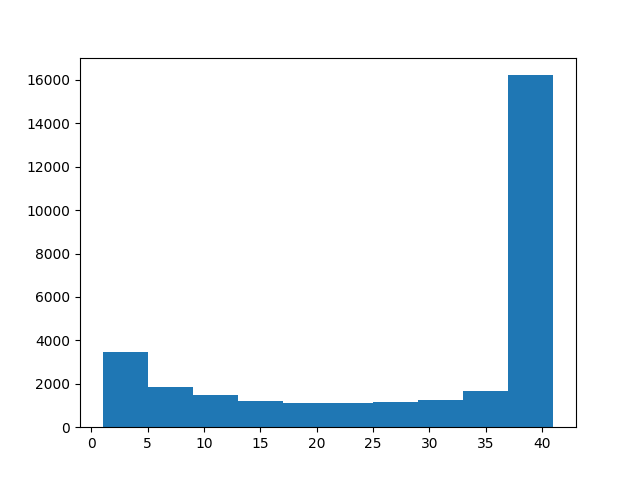

[(1, 1239),
 (2, 870),
 (3, 762),
 (4, 603),
 (5, 534),
 (6, 503),
 (7, 411),
 (8, 383),
 (9, 406),
 (10, 374),
 (11, 358),
 (12, 327),
 (13, 305),
 (14, 310),
 (15, 283),
 (16, 289),
 (17, 301),
 (18, 283),
 (19, 286),
 (20, 248),
 (21, 294),
 (22, 275),
 (23, 255),
 (24, 288),
 (25, 285),
 (26, 320),
 (27, 252),
 (28, 290),
 (29, 300),
 (30, 296),
 (31, 322),
 (32, 331),
 (33, 375),
 (34, 395),
 (35, 417),
 (36, 477),
 (37, 541),
 (38, 646),
 (39, 870),
 (40, 1872),
 (41, 12287)]

In [118]:
app = [ii[1] for ii in list(dict(Counter(gene_ids)).items())]
# plt.hist(app, bins=np.arange(1, 41));
plt.hist(app);
sorted(dict(Counter(app)).items())
# sum(list(dict(Counter(app)).values()))

In [17]:
np.array([1,2,3], dtype='f').dtype

dtype('float32')

In [29]:
SAMPLES_PATH = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\dummy'

In [8]:
# samples = [subfolder for subfolder in os.listdir(SAMPLES_PATH) if subfolder.startswith('M')]
# for sample_id in samples:
#     print(sample_id)
#     sample_path = join(SAMPLES_PATH, sample_id, f'{sample_id}.pkl')
#     rna_sample = pickle.load(open(sample_path, 'rb'))
    
    
#     for c in rna_sample.cells_information:
#         c.count_insertions = c.count_insertions > 0
#         c.count_deletions = c.count_deletions > 0
#     print('num del ' + str(sum(rna_sample.cells_information.getattr('count_deletions'))))
#     print('num ins ' + str(sum(rna_sample.cells_information.getattr('count_insertions'))))
#     print(f'num cells {rna_sample.number_of_cells}', end='\n\n')


In [30]:
def extract_data_from_pickle(pickle_path):
    """
    Retrieves data from PC located in PICKLE_PATH.
    :return: cells_form, gene_names, patients_information
    """
    cells_form, gene_names, patients_information = pickle.load(open(pickle_path, "rb"))
    return cells_form, gene_names, patients_information

# from termcolor import colored
# from data import *
PICKLE_PATH = r'D:\Technion studies\Keren Laboratory\Data\smart_seq\SmartSeq_RNAseq_DATA.p'


In [11]:
cells, gene_names, patients_information = extract_data_from_pickle(PICKLE_PATH)
# dataset = RNAseq_Dataset(cells, patients_information, gene_names)

In [12]:
from utilities.smart_seq_dataset import RNAseq_Dataset
dataset = RNAseq_Dataset(cells, patients_information, gene_names)

In [27]:
barcode = 'F11_P3_M41_L001'

c_idx = [idx for idx, c in enumerate(dataset.cells_information_list) if c.cell_id==barcode][0]
print(f'index: {c_idx}')
print(f'2 cluster: {dataset.cells_information_list[c_idx].t_cell_2_cluster}')
print(f'6 cluster: {dataset.cells_information_list[c_idx].t_cell_6_cluster}')
print(f'6 cluster: {dataset.cells_information_list[c_idx].general_11_cluster}')
print(f'supervised: {dataset.cells_information_list[c_idx].supervised}')


index: 15216
2 cluster: CD8_G
6 cluster: CD8_2
6 cluster: 9
supervised: ['CD8 Cytotoxic T cells', 'Activated T cells', 'T cells']


In [35]:
path2 = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\smart_seq\SmartSeq_RNAseq_DATA_3.1.2021.p'
cells2, gene_names2, patients_information2 = extract_data_from_pickle(path2)
dataset2 = RNAseq_Dataset(cells, patients_information, gene_names)


In [46]:
barcode = 'A4_P6_M11'


c_idx = [idx for idx, c in enumerate(dataset2.cells_information_list) if c.cell_id==barcode][0]
print(f'index: {c_idx}')
print(f'2 cluster: {dataset2.cells_information_list[c_idx].t_cell_2_cluster}')
print(f'6 cluster: {dataset2.cells_information_list[c_idx].t_cell_6_cluster}')
print(f'6 cluster: {dataset2.cells_information_list[c_idx].general_11_cluster}')
print(f'supervised: {dataset2.cells_information_list[c_idx].supervised}')

index: 12
2 cluster: CD8_G
6 cluster: CD8_4
6 cluster: 5
supervised: ['CD8 Cytotoxic T cells', 'Activated T cells', 'Memory CD8 T cells', 'T cells']


In [42]:
c_idx = 0


print(f'index: {c_idx}')
print(f'index: {dataset2.cells_information_list[c_idx].cell_id}')
print(f'2 cluster: {dataset2.cells_information_list[c_idx].t_cell_2_cluster}')
print(f'6 cluster: {dataset2.cells_information_list[c_idx].t_cell_6_cluster}')
print(f'6 cluster: {dataset2.cells_information_list[c_idx].general_11_cluster}')
print(f'supervised: {dataset2.cells_information_list[c_idx].supervised}')

index: 0
index: A10_P3_M11
2 cluster: None
6 cluster: None
6 cluster: 5
supervised: ['NK cells']


In [4]:
import numpy as np

s_f = 10000
val = 900
np.log2(val/s_f)

-3.473931188332412

In [1]:
import sys
import os
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
lib5 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\scripts'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)

import os
from os.path import join
import sklearn
from droplet_dataset import *
from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
sklearn.__version__
from utilities.general_helpers import get_common_indices_of_boolean_lists, flip_sign_of_boolean_list
%matplotlib notebook

In [26]:
sample_id = 'M121'
ROW_SAMPLES_PATH = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\ROW_DATA'
SAMPLES_INFORMATION_PATH = fr'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\4.3.21'


rna_sample = loading_sample(row_data_path=join(ROW_SAMPLES_PATH, f'{sample_id}.pkl'),
                                    cells_information_path=join(SAMPLES_INFORMATION_PATH, f'{sample_id}.pkl'))
rna_sample = rna_sample.filter_cells_by_property('should_be_removed', False)

In [27]:
rna_sample.cells_information.getattr('is_myeloid')
rna_sample.cells_information.getattr('is_lymphoid')
list(rna_sample.cells_information.cells_information_list[0].__dict__.keys())

['cell_type_list',
 'conflict_related_cell_types',
 'is_apoptosis',
 'is_immune',
 'is_cancer',
 'cancer_immune_conflict',
 'is_doublet',
 'is_lymphoid',
 'is_myeloid',
 'is_CelBender_empty',
 'is_stromal',
 'should_be_removed']

In [28]:
sub_rna_sample = rna_sample[get_common_indices_of_boolean_lists(rna_sample.cells_information.getattr('is_myeloid'), rna_sample.cells_information.getattr('is_lymphoid'))]

In [29]:
sub_rna_sample.cells_information.getattr('cell_type_list')

[['Neutrophils', 'Immune_general', 'NK cells'],
 ['Neutrophils', 'Immune_general', 'NK cells'],
 ['Neutrophils', 'Immune_general', 'NK cells'],
 ['Neutrophils', 'Immune_general', 'B cells'],
 ['Neutrophils', 'Immune_general', 'B cells'],
 ['Neutrophils', 'Immune_general', 'B cells'],
 ['Neutrophils', 'B cells', 'pDCs', 'cDCs_dendritic_cells', 'Immune_general'],
 ['Neutrophils', 'Immune_general', 'B cells'],
 ['Immune_general', 'Granolocytes', 'B cells'],
 ['Neutrophils', 'Immune_general', 'NK cells'],
 ['Neutrophils', 'Immune_general', 'B cells'],
 ['Neutrophils', 'B cells', 'Monocyte_mature', 'Immune_general'],
 ['Immune_general', 'Granolocytes', 'B cells'],
 ['Neutrophils', 'Immune_general', 'NK cells'],
 ['Immune_general', 'Granolocytes', 'B cells'],
 ['pDCs', 'Immune_general', 'B cells'],
 ['Neutrophils', 'Immune_general', 'NK cells'],
 ['Neutrophils', 'Immune_general', 'NK cells'],
 ['Neutrophils', 'Immune_general', 'B cells'],
 ['Neutrophils', 'Immune_general', 'B cells'],
 ['Neu

In [30]:
sub_rna_sample.number_of_cells / rna_sample.number_of_cells

0.00591016548463357

In [37]:
sample_id = 'M121'
ROW_SAMPLES_PATH = fr'D:\Technion studies\Keren Laboratory\Data\droplet_seq\ROW_DATA'
SAMPLES_INFORMATION_PATH = fr'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\4.3.21'

samples = [subfolder.replace(".pkl", "") for subfolder in os.listdir(SAMPLES_INFORMATION_PATH)]

cell_types = []
for sample_id in samples:
    rna_sample = loading_sample(row_data_path=join(ROW_SAMPLES_PATH, f'{sample_id}.pkl'),
                                        cells_information_path=join(SAMPLES_INFORMATION_PATH, f'{sample_id}.pkl'))
    rna_sample = rna_sample.filter_cells_by_property('should_be_removed', False)
    sub_rna_sample = rna_sample[get_common_indices_of_boolean_lists(rna_sample.cells_information.getattr('is_myeloid'), rna_sample.cells_information.getattr('is_lymphoid'))]
    cell_types.append(sub_rna_sample.cells_information.getattr("cell_type_list"))
    print(f'{sample_id}: {sub_rna_sample.number_of_cells / rna_sample.number_of_cells}')

M100: 0.0
M101: 0.0011399908800729594
M102: 9.865824782951855e-05
M103: 0.008633824276282377
M104: 0.0002402691013935608
M105: 0.0005816658911121452
M106: 0.0002134927412467976
M107: 0.00028011204481792715
M108: 0.0
M109: 0.0001668335001668335
M110: 0.0017992083483267362
M111: 0.008907159986296678
M112: 0.0006971880083662561
M114: 0.001981178801386825
M115: 0.0020964360587002098
M116: 0.0009052504526252263
M118: 0.004611837048424289
M120: 0.03949600193845408
M121: 0.00591016548463357
M122: 0.0008166598611678236
M123: 0.003962139555359894
M124: 0.001754770783066462
M125: 0.004149377593360996
M126: 0.001934984520123839
M127: 0.0
M128: 0.0
M129: 0.00026232948583420777
M130: 0.01235813366960908
M131: 0.009456838021338506
M132: 0.003156441112645492
M133: 0.006736068585425597
M134: 0.007893438579181056
M135: 0.0010420284821118443
M136: 0.0017002671848433326
M137: 0.00015865460891638903
M138: 0.0009302325581395349
M139: 0.001993024414549078
M140: 0.013228257810301155
M141: 0.00248550124275062

In [38]:
Counter(flatten_list(flatten_list(cell_types)))

Counter({'Neutrophils': 713,
         'Immune_general': 728,
         'B cells': 200,
         'NK cells': 595,
         'Monocyte_mature': 107,
         'cDCs_dendritic_cells': 86,
         'myeloid cells_general_mature': 96,
         'Granolocytes': 85,
         'Macrophage_mature': 55,
         'myeloid cells_general_immature': 4,
         'Monocyte_immature': 7,
         'CD4 helper T cells': 1,
         'T cells': 3,
         'pDCs': 4})

,sample,barcode
0,M102,ACGGAGAGTCTGCCAG-1
1,M102,GATCGTATCTGCGTAA-1
2,M102,GGCAATTGTACCGAGA-1
3,M102,GTACGTACACGCATCG-1


In [68]:
directory = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\CellBender\update_runs\empty_kept'
empty_cells_barcode = pd.DataFrame(columns=['sample', 'barcode'])

# path = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\CellBender\update_runs\empty_kept\M106\M106.pkl'
# file = pickle.load(open(path, 'rb'))
for sample_id in os.listdir(directory):
    print(f'\n{sample_id}')
    sample = pickle.load(open(join(directory, sample_id, f'{sample_id}.pkl'), 'rb'))
    print(sample.number_of_cells - sum(sample.cells_information.getattr('is_CelBender_empty')))
    print(sum(sample.cells_information.getattr('is_CelBender_empty')))
    
    barcodes = sample[sample.cells_information.getattr('is_CelBender_empty')].barcodes
    sample_ids = [sample_id] * len(barcodes)

    empty_cells_barcode = empty_cells_barcode.append(pd.DataFrame(np.array([np.array(x) for x in [sample_ids, barcodes]]).T, columns=empty_cells_barcode.columns))


M100
2483
1572

M101
3273
1868

M102
22690
4

M103
1611
842

M104
3065
1879

M105
11950
2362

M106
2745
2391

M107
5071
2964

M108
23817
4

M109
6827
1005

M110
3067
1240

M111
5460
1122

M112
3350
1526

M114
4811
5596

M115
5537
510

M116
254
3347

M118
942
745

M120
1204
3409

M121
5367
576

M122
1712
879

M123
6743
0

M124
1107
4041

M125
503
4

M126
533
2592

M127
5534
0

M128
8327
4

M129
5855
3056

M130
535
5446

M131
4325
397

M132
3084
2865

M133
5696
0

M134
1357
1027

M135
3344
44

M136
3274
1598

M137
5219
4134

M138
2914
2001

M139
2914
2001

M140
3483
273

M141
636
597

M143
5533
5459

M144
10765
0

M145
8392
519

M146
7169
1112

M97
2656
1640

M98
2708
2429

M99
2493
2600


In [69]:

save_path = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\CellBender\empty_droplets_barcodes.csv'
empty_cells_barcode.reset_index(drop=True).to_csv(save_path, index=False)

In [8]:
file.number_of_cells - sum(file.cells_information.getattr('is_CelBender_empty'))

2745